# Bancos de filtros de la tranformada de onduleta discreta:
<span style="font-family: 'Verdana'; color: red;"> *Bronquivoide* </span>

### Este notebook es una continuación directa del notebook sobre fundamentos del análisis de onduletas en procesamiento de señales, pues el desarrollo de algoritmos para la transformada discreta de onduleta conduce a implementar bancos de filtros.

### Los bancos de filtros son un conjunto de filtros que descomponen una señal descrita analíticamente por una onduleta en diferentes componentes de frecuencia a través de distintos niveles de descomposición.

### En Python, la biblioteca PyWT, usada en el notebook de *análisis de onduletas*, se compone de cuatro tipo de filtros, dos para reconstrucción de señales y dos para descomposición:

### 1) Filtro Pasa Bajas (*Lowpass Filter*) de descomposición.
### 2) Filtro Pasa Bajas de reconstrucción.
### 3) Filtro Pasa Altas (*Highpass Filter*) de descomposición.
### 4) Filtro Pasa Altas de reconstrucción.

# $\blacksquare$ Filtro Pasa Bajas:  

### En su forma más simple,  a un tiempo $n$, un filtro pasa bajas proporciona una señal de salida $y(n)$ de una señal de entrada $x(n)$ y su componente al tiempo discreto previo dada por:

<font size="5"> $y(n)=\frac{x(n)+x(n-1)}{2}$ </font>

### Estamos hablando de un filtro de promedio móvil (*moving average filter*), pues la salida toma el promedio de las componentes $x(n)$ y $x(n-1)$.

### Notemos que la convolución es de la forma $y(n)=h(n)\diamond x(n)=\sum _k h(k)x(n-k)$, para $k=0,1$. Es decir, hablamos de los coeficientes $h(0)=\frac{1}{2}=h(1)$.

### La respuesta de frecuencia para este filtro es:

<font size="5"> $H(\omega)=|H(\omega)|e^{i\phi (\omega)}=cos(\frac{\omega}{2})e^{-i(\omega /2)}$ </font>

### Cuyo módulo y fase (la cual es una relación lineal), están dadas por:

<font size="5"> $|H(\omega)|=cos(\frac{\omega}{2})$, $\phi (\omega)=-\frac{\omega}{2}$ </font>

### Nota: Consultar si es necesario el archivo PDF sobre teoría de los filtros digitales en este mismo repositorio.

# $\blacksquare$ Filtro Pasa Altas:  

### El filtro pasa bajas tiene un filtro *espejo*, el filtro pasa altas. 

### Mientras que el pasa bajas toma un promedio (una suma asociada), el pasa altas toma una diferencia. La salida en su forma más simple es:

<font size="5"> $y(n)=\frac{x(n)-x(n-1)}{2}$ </font>

### Análogamente, tenemos los coeficientes asociados a la convolución $h(0)=\frac{1}{2}$, $h(1)=-\frac{1}{2}$ 

### La respuesta de frecuencia es:

<font size="5"> $H(\omega)=isen(\frac{\omega}{2})e^{-i(\omega /2)}$ </font>

### Con respecto a los bancos de filtros, la WT permite reconstruir una señal analógica $f(t)$ mediante las onduletas madre $\psi (t)$ y padre $\phi (t)$ (definidas en el notebook de fundamentos del análisis de onduletas), bajo la relación:

<font size="5"> $f(t)=\sum _{k,j} C_{k,j} \phi (t) + \sum _{k,j} D_{k,j} \psi (t), \forall j,k \in \mathbb{Z}$ </font>

### A los conjuntos $\{C_{k,j}\}, \{D_{k,j}\}$ se les conoce como coeficientes de escalamiento.

# Ejemplo de aplicación de bancos de filtros para una onduleta:

### Vamos a aplicar los cuatro filtros mencionados a una onduleta de la familia *Symlet*, ejemplificando gráficamente:


In [8]:
import matplotlib.pyplot as plt 
from matplotlib import style
import numpy as np
import pywt

In [9]:
onduleta=pywt.Wavelet('sym2') #Establecemos la onduleta de la biblioteca pywt
print(onduleta) #Información de ella

Wavelet sym2
  Family name:    Symlets
  Short name:     sym
  Filters length: 4
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       near symmetric
  DWT:            True
  CWT:            False


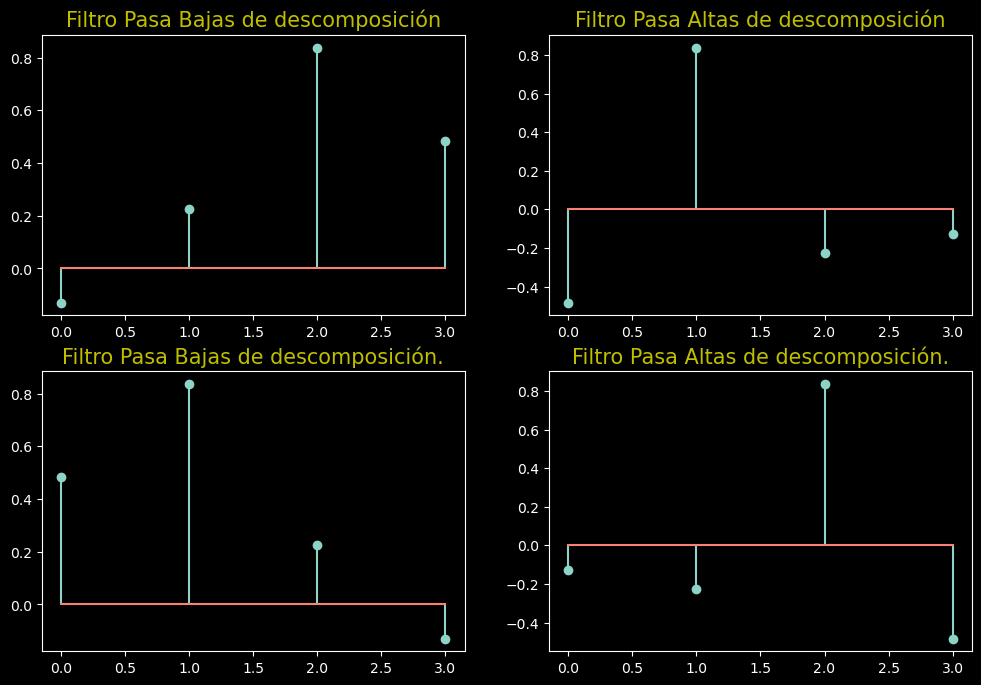

In [17]:
#Aplicacción del filtro:
[dec_low, dec_high, rec_low, rec_high]=onduleta.filter_bank

#Gráfico del proceso del filtrado:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(12,8))
style.use('dark_background')
ax1.stem(dec_low)
ax1.set_title('Filtro Pasa Bajas de descomposición', fontsize = 15, color="y")
ax2.stem(dec_high)
ax2.set_title('Filtro Pasa Altas de descomposición', fontsize = 15, color="y")
ax3.stem(rec_low)
ax3.set_title('Filtro Pasa Bajas de descomposición.', fontsize = 15, color="y")
ax4.stem(rec_high)
ax4.set_title('Filtro Pasa Altas de descomposición.', fontsize = 15, color="y")

plt.show()

# El eje X de las gráficas corresponde a los índices de los coeficientes asociados a los filtros.
# El eje X de las gráficas corresponde al valor de los coeficientes del filtro en cada índice.


# Bibliografía recomendada:

### $\blacksquare$ Nguyen, T., & Strang, G. (1996). Wavelets and filter banks. Wellesley College.

### $\blacksquare$ Debnath, L., & Shah, F. A. (2015). Wavelet transforms and their applications. Birkhäuser Boston: Birkhäuser.

### $\blacksquare$ Bhatnagar, N. (2020). Introduction to wavelet transforms. Chapman and Hall/CRC.